<a href="https://colab.research.google.com/github/akm2208/Aayushi-First-Files/blob/main/AKM_Midterm_Question2biii.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
!pip install git+https://github.com/OpenHydrology/lmoments3.git
!pip install cftime
!pip install netCDF4

In [ ]:
import lmoments3 as lm
from lmoments3 import distr
import xarray as xr
import numpy as np
import pandas as pd
import netCDF4 as nc
import glob
import os
import cftime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Historical Temperature


In [ ]:
fn = "/content/drive/My Drive/CIVE5363_Midterm_Q2bii/tas_day_CanESM5_historical_r1i1p1f1_gn_18500101-20141231.nc"
ds =xr.open_dataset(fn, engine="netcdf4")

fn_future = "/content/drive/My Drive/CIVE5363_Midterm_Q2bii/tas_day_CanESM5_ssp585_r1i1p1f1_gn_20150101-21001231.nc"
ds_future =xr.open_dataset(fn_future, engine="h5netcdf")

ds_future

In [ ]:
ds['lon'] = xr.where(ds['lon'] > 180, ds['lon'] - 360, ds['lon'])
ds = ds.sortby('lon')
lat=ds.lat.values
lon=ds.lon.values

ds_future['lon'] = xr.where(ds_future['lon'] > 180, ds_future['lon'] - 360, ds_future['lon'])
ds_future = ds_future.sortby('lon')
print(ds_future)
lat=ds_future.lat.values
lon=ds_future.lon.values

In [ ]:
tas = ds.sel(time = '1850-01-01')
tas_future = ds_future.sel(time = '2100-01-01')


In [ ]:
def gev_wrapper(data,T):
    gevfit = gev_fit(data)
    RL = return_levels(gevfit,T)

    return  RL


def gev_fit(data):

    gevfit = distr.gev.lmom_fit(data)
    return gevfit


def return_levels(gevfit,T):

    #Return Level
    RL = distr.gev.ppf(1.0-1./T, **gevfit)

    return RL


In [ ]:
#historical
latitude= 35.8
longitude= -91

sq_diff_lat = (lat - latitude)**2
sq_diff_lon = (lon - longitude)**2

min_index_lat = sq_diff_lat.argmin()
min_index_lon = sq_diff_lon.argmin()
latitude_grid= lat.__getitem__(min_index_lat)
longitude_grid=lon.__getitem__(min_index_lon)

dsloc= ds.sel(lat=latitude_grid,lon= longitude_grid, method='nearest')
annual_max_historical_myarea = dsloc.groupby('time.year').max('time')

In [ ]:
annual_max_historical_myarea

In [ ]:
#Historical New York City
latitude= 40.70643329624679
longitude= -74.0093383948094

sq_diff_lat = (lat - latitude)**2
sq_diff_lon = (lon - longitude)**2

min_index_lat = sq_diff_lat.argmin()
min_index_lon = sq_diff_lon.argmin()
latitude_grid= lat.__getitem__(min_index_lat)
longitude_grid=lon.__getitem__(min_index_lon)

dsloc= ds.sel(lat=latitude_grid,lon= longitude_grid, method='nearest')
annual_max_historical_nyc = dsloc.groupby('time.year').max('time')

In [ ]:
annual_max_historical_nyc

In [ ]:
#future
latitude= 35.8
longitude= -91

sq_diff_lat = (lat - latitude)**2
sq_diff_lon = (lon - longitude)**2

min_index_lat = sq_diff_lat.argmin()
min_index_lon = sq_diff_lon.argmin()
latitude_grid= lat.__getitem__(min_index_lat)
longitude_grid=lon.__getitem__(min_index_lon)

ds_future_loc= ds_future.sel(lat=latitude_grid,lon= longitude_grid, method='nearest')
annual_max_future_myarea = ds_future_loc.groupby('time.year').max('time')

In [ ]:
annual_max_future_myarea

In [ ]:
#Future New York City
latitude= 40.70643329624679
longitude= -74.0093383948094

sq_diff_lat = (lat - latitude)**2
sq_diff_lon = (lon - longitude)**2


min_index_lat = sq_diff_lat.argmin()
min_index_lon = sq_diff_lon.argmin()
latitude_grid= lat.__getitem__(min_index_lat)
longitude_grid=lon.__getitem__(min_index_lon)

ds_future_loc= ds_future.sel(lat=latitude_grid,lon= longitude_grid, method='nearest')
annual_max_future_nyc = ds_future_loc.groupby('time.year').max('time')

In [ ]:
annual_max_future_nyc

In [ ]:
if not np.isnan(np.min(annual_max_historical_myarea.tas)):
    annual_max_historical_myarea = np.array(annual_max_historical_myarea.tas)

if not np.isnan(np.min(annual_max_historical_nyc.tas)):
    annual_max_historical_nyc = np.array(annual_max_historical_nyc.tas)

if not np.isnan(np.min(annual_max_future_myarea.tas)):
    annual_max_future_myarea = np.array(annual_max_future_myarea.tas)

if not np.isnan(np.min(annual_max_future_nyc.tas)):
    annual_max_future_nyc = np.array(annual_max_future_nyc.tas)


In [ ]:
T_100 = np.arange(0.1, 99.1, 0.1) + 1
myhistoricalarea_RL_kelvin = gev_wrapper(annual_max_historical_myarea, T_100)
nyc_RL_kelvin = gev_wrapper(annual_max_historical_nyc, T_100)
myfuturearea_RL_kelvin = gev_wrapper(annual_max_future_myarea, T_100)
nycfuture_RL_kelvin = gev_wrapper(annual_max_future_nyc, T_100)

myhistoricalarea_RL_celsius = myarea_RL_kelvin - 273.15
nyc_RL_celsius = nyc_RL_kelvin - 273.15
myfuturearea_RL_celsius = myfuturearea_RL_kelvin - 273.15
nycfuture_RL_celsius = nycfuture_RL_kelvin - 273.15

In [ ]:
myhistoricalarea_RL_30 = myhistoricalarea_RL_celsius[300]
myhistoricalarea_RL_100 = myhistoricalarea_RL_celsius[-1]

myhistoricalarea_RL_30 = myhistoricalarea_RL_celsius[300]
myhistoricalarea_RL_100 = myhistoricalarea_RL_celsius[-1]

nyc_RL_30 = nyc_RL_celsius[300]
nyc_RL_100 = nyc_RL_celsius[-1]

myfuturearea_RL_30 = myfuturearea_RL_celsius[300]
myfuturearea_RL_100 = myfuturearea_RL_celsius[-1]

nycfuture_RL_30 = nycfuture_RL_celsius[300]
nycfuture_RL_100 = nycfuture_RL_celsius[-1]


In [ ]:
myhistoricalarea_RL_100 = myhistoricalarea_RL_celsius[-1]
myfuturearea_RL_100 = myfuturearea_RL_celsius[-1]

print(f"100 year Return Level for my area, historical = {myhistoricalarea_RL_100:.2f} °C")
print(f"100 year Return Level for my area, future = {myfuturearea_RL_100:.2f} °C")

100 year Return Level for my area, historical = 37.42 °C
100 year Return Level for my area, future = 46.06 °C


100 year Return Level for my area, historical = 37.42 °C
100 year Return Level for my area, future = 46.06 °C


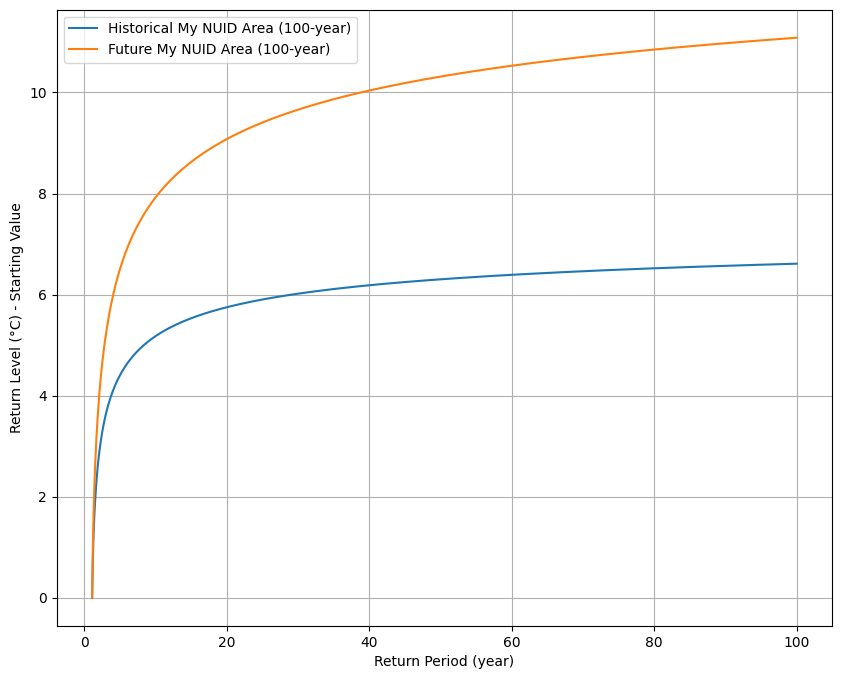

In [ ]:
plt.figure(figsize=[10, 8])


plt.plot(T_100, myhistoricalarea_RL_celsius - myhistoricalarea_RL_celsius[0], label='Historical My NUID Area (100-year)')
plt.plot(T_100, myfuturearea_RL_celsius - myfuturearea_RL_celsius[0], label='Future My NUID Area (100-year)')

print(f"100 year Return Level for my area, historical = {myhistoricalarea_RL_100:.2f} °C")
print(f"100 year Return Level for my area, future = {myfuturearea_RL_100:.2f} °C")

plt.grid()
plt.ylabel('Return Level (°C) - Starting Value')
plt.xlabel('Return Period (year)')
plt.legend()


100 year Return Level for historical my area = 37.42 °C
100 year Return Level for future my area = 46.06 °C
100 year Return Level for historical New York City = 30.77 °C
100 year Return Level for future New York City = 38.78 °C


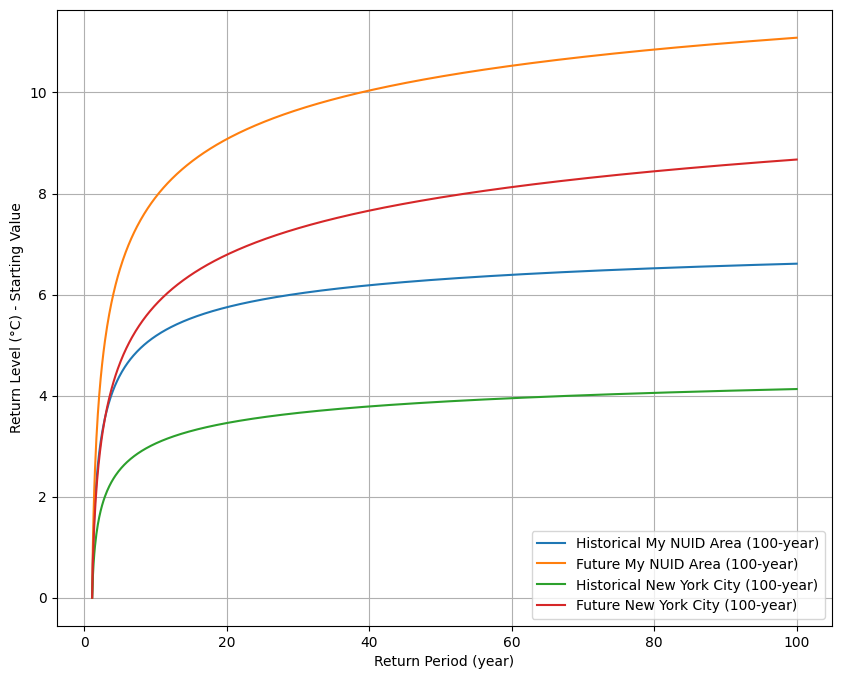

In [ ]:
plt.figure(figsize=[10, 8])

plt.plot(T_100, myhistoricalarea_RL_celsius - myhistoricalarea_RL_celsius[0], label='Historical My NUID Area (100-year)')
plt.plot(T_100, myfuturearea_RL_celsius - myfuturearea_RL_celsius[0], label='Future My NUID Area (100-year)')
plt.plot(T_100, nyc_RL_celsius - nyc_RL_celsius[0], label='Historical New York City (100-year)')
plt.plot(T_100, nycfuture_RL_celsius - nycfuture_RL_celsius[0], label='Future New York City (100-year)')

print(f"100 year Return Level for historical my area = {myhistoricalarea_RL_100:.2f} °C")
print(f"100 year Return Level for future my area = {myfuturearea_RL_celsius[-1]:.2f} °C")
print(f"100 year Return Level for historical New York City = {nyc_RL_celsius[-1]:.2f} °C")
print(f"100 year Return Level for future New York City = {nycfuture_RL_celsius[-1]:.2f} °C")

plt.grid()
plt.ylabel('Return Level (°C) - Starting Value')
plt.xlabel('Return Period (year)')
plt.legend()
